<a href="https://colab.research.google.com/github/zhaoheng001/colabtogithubdemo/blob/master/lines32_creat_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import functools
import glob
import math
import os
import random

import numpy as np
import tensorflow as tf

In [ ]:
def draw_line(angle, height, width, w=2.):
    m = np.zeros((height, width, 1))
    x0 = height*0.5
    y0 = width*0.5
    x1 = x0 + (x0 - 1) * math.cos(-angle)
    y1 = y0 + (y0 - 1) * math.sin(-angle)
    flip = False
    if abs(y0 - y1) < abs(x0 - x1):
        x0, x1, y0, y1 = y0, y1, x0, x1
        flip = True
    if y1 < y0:
        x0, x1, y0, y1 = x1, x0, y1, y0
    x0, x1 = x0 - w / 2, x1 - w / 2
    dx = x1 - x0
    dy = y1 - y0
    ds = dx / dy if dy != 0 else 0
    yi = int(math.ceil(y0)), int(y1)
    points = []
    for y in range(int(y0), int(math.ceil(y1))):
        if y < yi[0]:
            weight = yi[0] - y0
        elif y > yi[1]:
            weight = y1 - yi[1]
        else:
            weight = 1
        xs = x0 + (y - y0 - .5) * ds
        xe = xs + w
        xi = int(math.ceil(xs)), int(xe)
        if xi[0] != xi[1]:
            points.append((y, slice(xi[0], xi[1]), weight))
        if xi[0] != xs:
            points.append((y, int(xs), weight * (xi[0] - xs)))
        if xi[1] != xe:
            points.append((y, xi[1], weight * (xe - xi[1])))
    if flip:
        points = [(x, y, z) for y, x, z in points]
    for y, x, z in points:
        m[y, x] += 2 * z
    m -= 1
    m = m.clip(-1, 1)
    return m

(32, 32, 1)


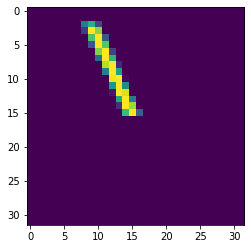

In [ ]:
#show one example
x = draw_line(2, 32, 32)
print(x.shape)
x = np.squeeze(x)
x.shape
from matplotlib import pyplot as plt
plt.imshow(x, interpolation='nearest')
plt.show()

In [ ]:
def creat_dataset(num_data):
  dataset = np.zeros((num_data,32,32))
  for i in range(num_data):
    angle = 2 * random.random() * math.pi
    m = draw_line(angle, 32, 32)
    m = np.squeeze(m)
    dataset[i] = m
  return dataset
n_dataset = 5000
dataset_train = creat_dataset(n_dataset)
print(dataset_train.shape)

(5000, 32, 32)


In [ ]:
import os
from google.colab import drive
#mount google drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/lines32"
os.chdir(path)
os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['0.jpg', '2.jpg', '3.jpg', '4.jpg', '.ipynb_checkpoints']

In [ ]:
#save 5000 lines image
import imageio
import skimage.io as io
for i in range(n_dataset):
  im = dataset_train[i]
  im = np.array(im)
  imageio.imwrite(np.str(i)+'.jpg',im) #save
  #io.imsave(content/sample_data/lines32+np.str(i)+'.jpg',im)

im = dataset_train[1]
print(im.shape)
im = np.array(im)
#print(im)

#creat grey scale image
#imageio.imwrite('im.jpg', im)


from matplotlib import pyplot as plt
plt.imshow(im, interpolation='nearest')
plt.show()

In [ ]:
def input_lines(batch_size, size=(32, 32, 1), limit=None):
    h, w, c = size

    def gen():
        count = 0
        while limit is None or count < limit:
            angle = 2 * random.random() * math.pi
            m = draw_line(angle, h, w)
            label = int(10 * angle / (2 * math.pi - 1e-6))
            count += 1
            yield m, label

    ds = tf.data.Dataset.from_generator(gen, (tf.float32, tf.int64),
                                        (size, tuple()))
    ds = ds.map(lambda x, y: dict(x=x, label=y))
    ds = ds.batch(batch_size)
    return ds, size[0], size[1], size[2]

(<BatchDataset shapes: {x: (None, 32, 32, 1), label: (None,)}, types: {x: tf.float32, label: tf.int64}>,
 32,
 32,
 1)